<a href="https://colab.research.google.com/github/Rafagars/Eurovision-Analisis/blob/main/Eurovision_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
urls = []
for i in range(16, 24):
  if i != 20:
    urls.append(f'https://raw.githubusercontent.com/Rafagars/Eurovision-Analisis/refs/heads/main/20{i}_jury_results.csv')


In [95]:
import pandas as pd

datas = []

for i in range(0, 7):
  datas.append(pd.read_csv(urls[i]))


In [96]:
# @title Tabla de valores [Participante, Puntaje Total, Puntaje Jueces, Puntaje Televoto]
for i in range(len(datas)):
  datas[i] = datas[i][['Contestant', 'Total score', 'Jury score', 'Televoting score']]
  datas[i].sort_values(by='Total score', ascending=False, inplace=True)
  if i < 4:
    datas[i]['Year'] = [2016 + i for j in range(len(datas[i]))]
  else:
    datas[i]['Year'] = [2016 + (i+1) for j in range(len(datas[i]))]

df = pd.concat(datas, ignore_index=True)
pd.concat(datas, ignore_index=True)

,Contestant,Total score,Jury score,Televoting score,Year
0,Ukraine,534,211,323,2016
1,Australia,511,320,191,2016
2,Russia,491,130,361,2016
3,Bulgaria,307,127,180,2016
4,Sweden,261,122,139,2016
...,...,...,...,...,...
176,Albania,76,17,59,2023
177,Portugal,59,43,16,2023
178,Serbia,30,14,16,2023
179,United Kingdom,24,15,9,2023


In [97]:
# @title Tabla Puntaje Total de cada pais por año
filtered_data = df[df['Year'] > 2015]
pd.pivot_table(filtered_data, values='Total score', index='Contestant', columns='Year')

Year,2016,2017,2018,2019,2021,2022,2023
Contestant,,,,,,,
Albania,NaN,NaN,184.0,90.0,57.0,NaN,76.0
Armenia,249.0,79.0,NaN,NaN,NaN,61.0,122.0
Australia,511.0,173.0,99.0,284.0,NaN,125.0,151.0
Austria,151.0,93.0,342.0,NaN,NaN,NaN,120.0
Azerbaijan,117.0,120.0,NaN,302.0,65.0,106.0,NaN
Belarus,NaN,83.0,NaN,31.0,NaN,NaN,NaN
Belgium,181.0,363.0,NaN,NaN,74.0,64.0,182.0
Bulgaria,307.0,615.0,166.0,NaN,170.0,NaN,NaN
Croatia,73.0,128.0,NaN,NaN,NaN,NaN,123.0


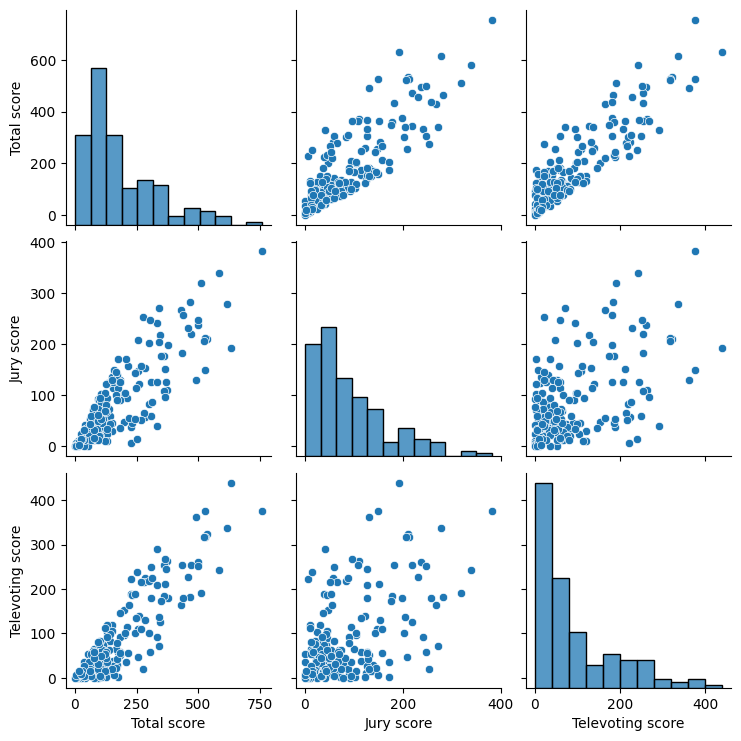

In [147]:
import seaborn as sns
sns.pairplot(df[['Total score', 'Jury score', 'Televoting score']])
plt.show()

In [136]:
df2 = df[['Contestant', 'Total score', 'Jury score', 'Televoting score']].groupby('Contestant').mean()
df2.sort_values(by='Total score', ascending=False, inplace=True)
df2

,Total score,Jury score,Televoting score
Contestant,,,
Russia,355.000000,120.000000,235.000000
Italy,340.000000,147.714286,192.285714
Sweden,334.714286,211.142857,123.571429
Ukraine,323.000000,96.166667,226.833333
Bulgaria,314.500000,161.250000,153.250000
North Macedonia,305.000000,247.000000,58.000000
Portugal,243.200000,148.600000,94.600000
Switzerland,241.500000,139.500000,102.000000
Finland,227.750000,67.000000,160.750000


Puntaje promedio por año

In [101]:
df[['Year', 'Total score', 'Jury score', 'Televoting score']].groupby('Year').mean()

,Total score,Jury score,Televoting score
Year,,,
2016,187.384615,93.692308,93.692308
2017,187.384615,93.692308,93.692308
2018,191.846154,95.923077,95.923077
2019,182.923077,91.461538,91.461538
2021,174.000000,87.000000,87.000000
2022,185.600000,92.800000,92.800000
2023,167.307692,82.538462,84.769231


Desviacion estandar de los puntajes por

In [102]:
df[['Year', 'Total score', 'Jury score', 'Televoting score']].groupby('Year').std()

,Total score,Jury score,Televoting score
Year,,,
2016,139.456108,67.899201,95.201164
2017,183.833637,88.353730,113.369050
2018,124.756945,73.832201,83.491759
2019,146.076397,81.844844,90.112477
2021,154.853737,79.059977,92.959776
2022,164.435904,84.188281,107.283891
2023,143.483454,74.518310,91.407355


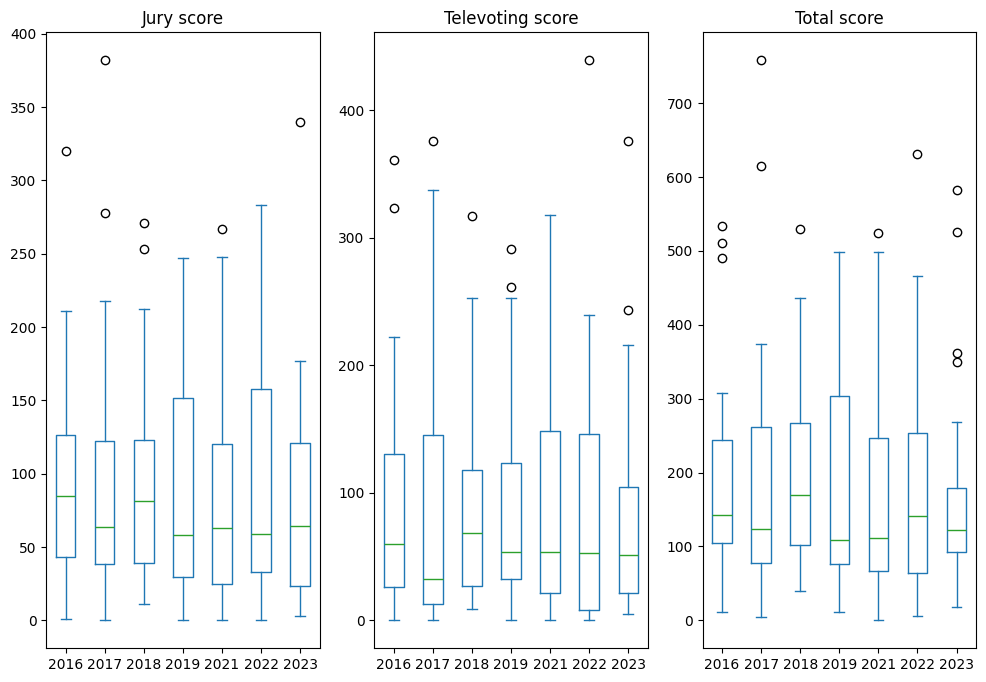

In [ ]:
# @title Boxplots del Puntaje de los jueces, televoto y total de cada año
df.plot.box(by='Year', figsize=(12, 8))
plt.show()

Histogramas *2016 - 2023*

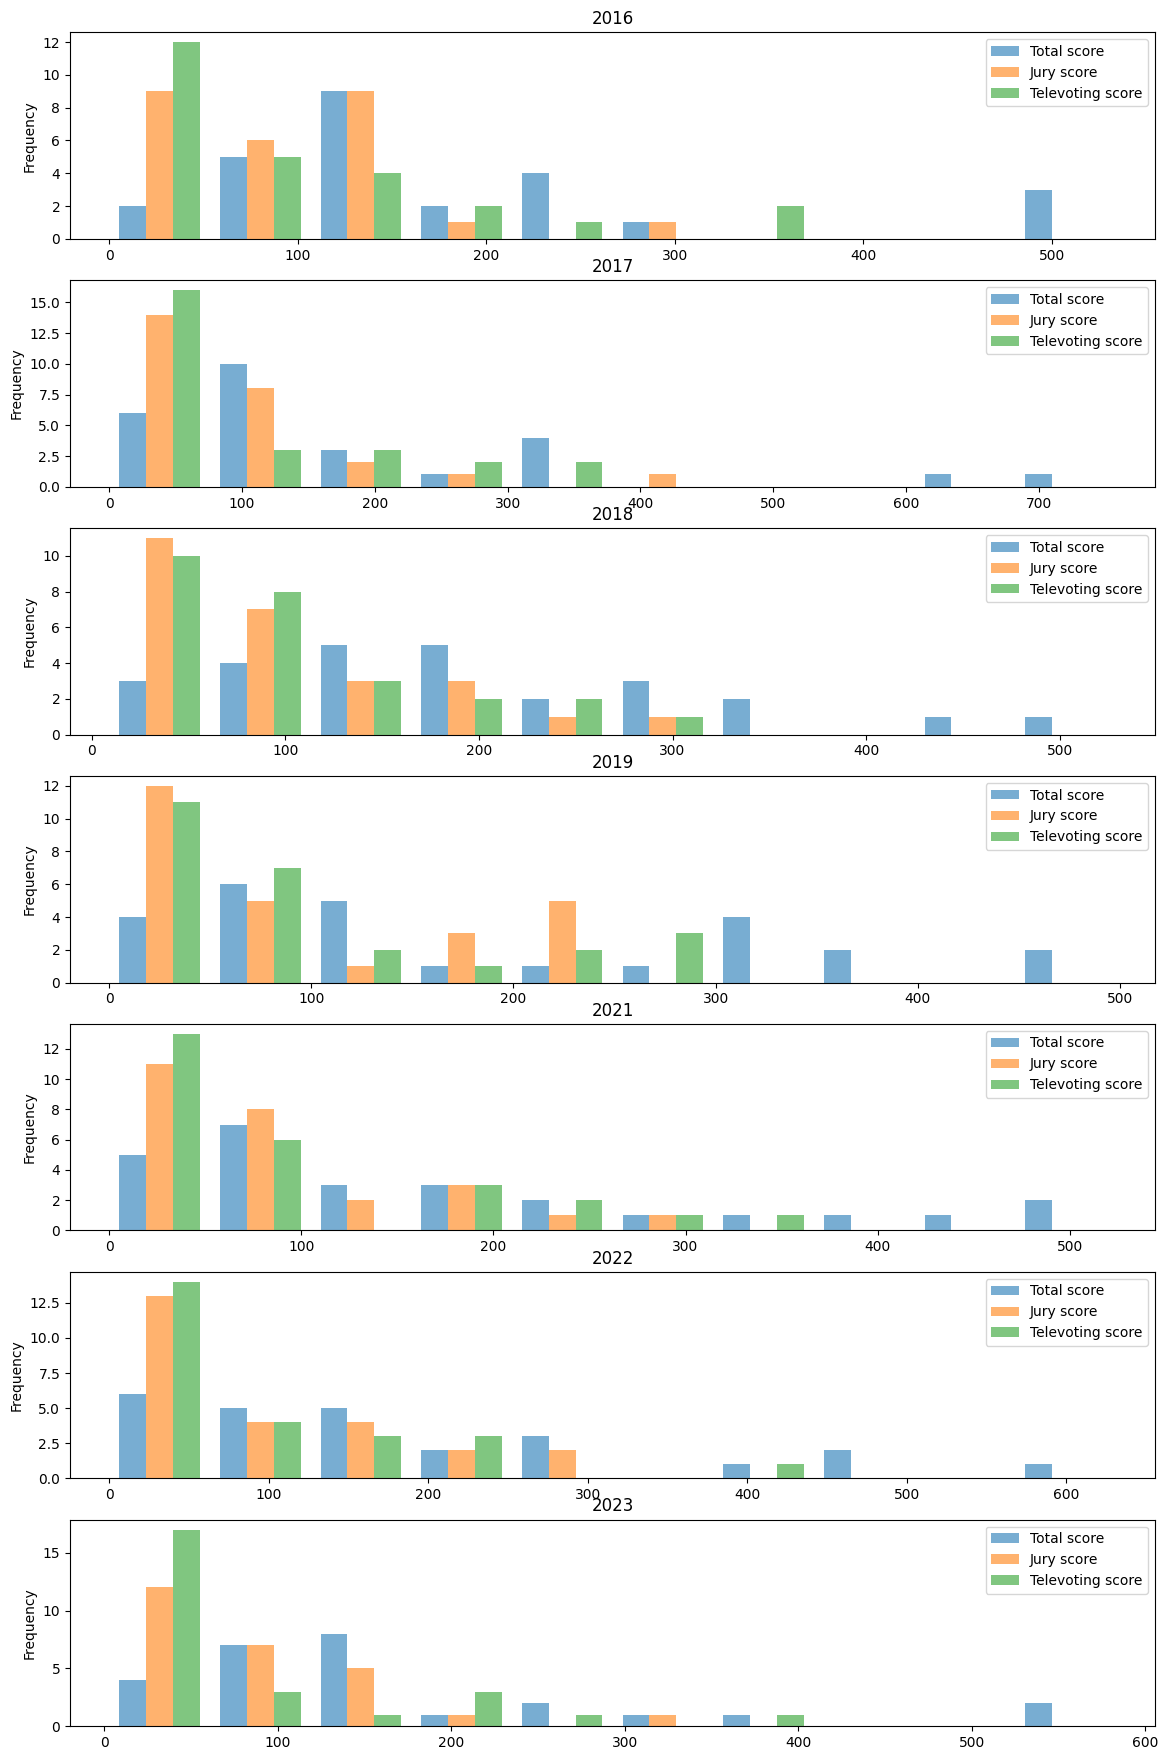

In [ ]:
df.plot.hist(by='Year',alpha=0.6, figsize=(14, 22))
plt.show()

In [118]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(df[['Televoting score']], df['Total score'])
print(f"coefficient of determination: {model.score(df[['Televoting score']], df['Total score'])}")
print(f"intercept: {model.intercept_}")
print(f"coefficient: {model.coef_}")

coefficient of determination: 0.797295171051799
intercept: 54.089119888356464
coefficient: [1.40422682]


In [119]:
model2 = LinearRegression()
model2.fit(df[['Jury score']], df['Total score'])
print(f"coefficient of determination: {model2.score(df[['Jury score']], df['Total score'])}")
print(f"intercept: {model2.intercept_}")
print(f"coefficient: {model2.coef_}")

coefficient of determination: 0.695054357223407
intercept: 35.98442953800409
coefficient: [1.60811184]


Agregamos ahora los datos de 2024 para ver como se comporta el modelo

In [120]:
df_2024 = pd.read_csv('https://raw.githubusercontent.com/Rafagars/Eurovision-Analisis/refs/heads/main/2024_jury_results.csv')
df_2024

,Contestant,Total score,Jury score,Televoting score
0,Switzerland,591,365,226
1,Croatia,547,210,337
2,Ukraine,453,146,307
3,France,445,218,227
4,Israel,375,52,323
5,Ireland,278,142,136
6,Italy,268,164,104
7,Armenia,183,101,82
8,Sweden,174,125,49
9,Portugal,152,139,13


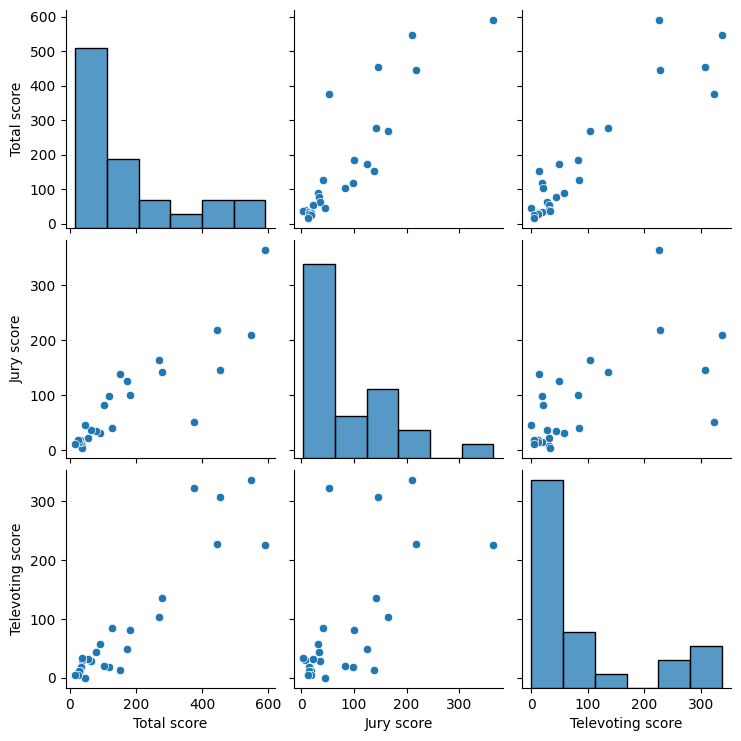

In [148]:
sns.pairplot(df_2024[['Total score', 'Jury score', 'Televoting score']])
plt.show()

In [146]:
# @title Prediccion del puntaje Total 2024 en base a puntaje de Televoto
prediccion_2024 = model.predict(df_2024[['Televoting score']])
d = {'Contestant': df_2024['Contestant'], 'Total score': df_2024['Total score'], 'Predicted Total score': prediccion_2024}
pd.DataFrame(data=d)

,Contestant,Total score,Predicted Total score
0,Switzerland,591,371.444381
1,Croatia,547,527.313558
2,Ukraine,453,485.186753
3,France,445,372.848608
4,Israel,375,507.654382
5,Ireland,278,245.063967
6,Italy,268,200.128709
7,Armenia,183,169.235719
8,Sweden,174,122.896234
9,Portugal,152,72.344069


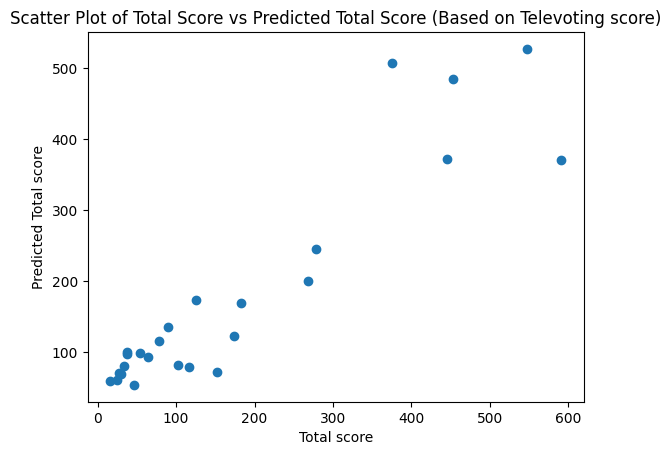

In [129]:
plt.scatter(df_2024['Total score'], prediccion_2024)
plt.xlabel('Total score')
plt.ylabel('Predicted Total score')
plt.title('Scatter Plot of Total Score vs Predicted Total Score (Based on Televoting score)')
plt.show()

In [158]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f"MSE: {mean_squared_error(df_2024['Total score'], prediccion_2024)}")
print(f"MAE: {mean_absolute_error(df_2024['Total score'], prediccion_2024)}")
print(f"R2: {r2_score(df_2024['Total score'], prediccion_2024)}")

MSE: 4575.268492161868
MAE: 53.10062797998069
R2: 0.8457099256428926


In [145]:
# @title Prediccion del puntaje Total 2024 en base a puntaje de los jueces
prediccion2_2024 = model2.predict(df_2024[['Jury score']])
d = {'Contestant': df_2024['Contestant'], 'Total score': df_2024['Total score'], 'Predicted Total score': prediccion2_2024}
pd.DataFrame(data=d)

,Contestant,Total score,Predicted Total score
0,Switzerland,591,622.945252
1,Croatia,547,373.687916
2,Ukraine,453,270.768758
3,France,445,386.552811
4,Israel,375,119.606245
5,Ireland,278,264.336311
6,Italy,268,299.714772
7,Armenia,183,198.403726
8,Sweden,174,236.998410
9,Portugal,152,259.511976


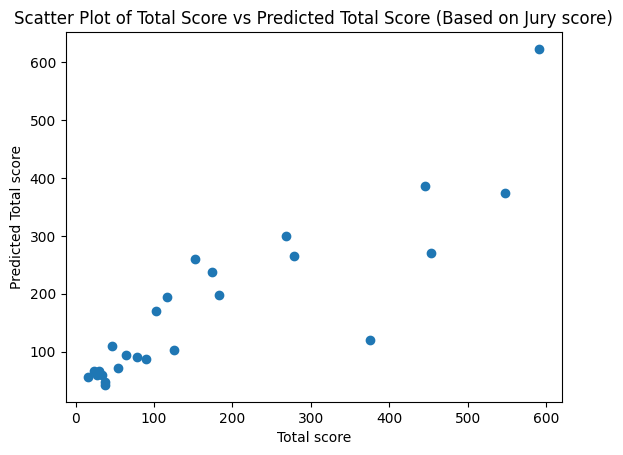

In [130]:
plt.scatter(df_2024['Total score'], prediccion2_2024)
plt.xlabel('Total score')
plt.ylabel('Predicted Total score')
plt.title('Scatter Plot of Total Score vs Predicted Total Score (Based on Jury score)')
plt.show()

In [159]:
print(f"MSE: {mean_squared_error(df_2024['Total score'], prediccion2_2024)}")
print(f"MAE: {mean_absolute_error(df_2024['Total score'], prediccion2_2024)}")
print(f"R2: {r2_score(df_2024['Total score'], prediccion2_2024)}")

MSE: 6920.2627445151975
MAE: 56.799704775449975
R2: 0.7666305583484007
